In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

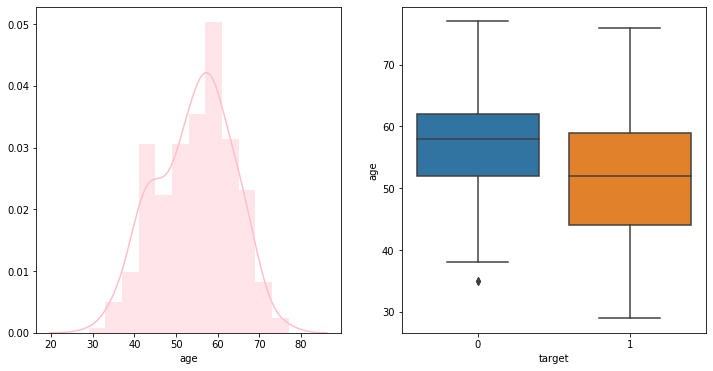

In [6]:
plt.subplots(12,figsize=(12,6))
plt.subplot(121)
sns.distplot(df['age'],color='pink')
plt.subplot(122)
sns.boxplot(x=df['target'],y=df['age'])

If we look at the age distribution, a huge chunk of people are actually over 40. Moreover looking at the boxplot we realise that younger people are more prone to heart disease while older people are less prone to heart diseases

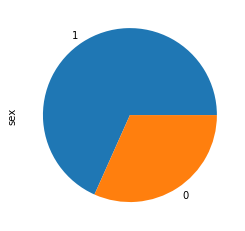

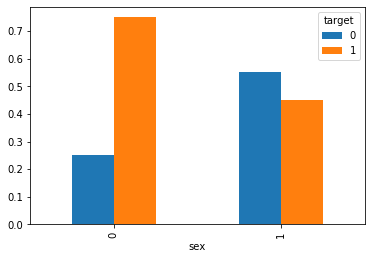

In [7]:

df['sex'].value_counts().plot(kind='pie')

pd.crosstab(df.sex,df.target,normalize='index').plot(kind='bar')



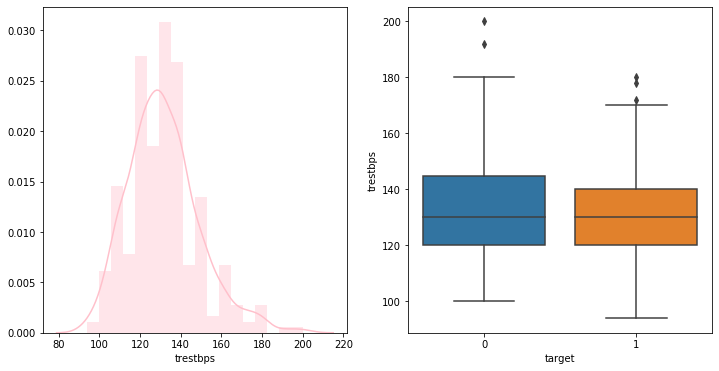

In [8]:
plt.subplots(12,figsize=(12,6))
plt.subplot(121)
sns.distplot(df['trestbps'],color='pink')
plt.subplot(122)
sns.boxplot(x=df['target'],y=df['trestbps'])

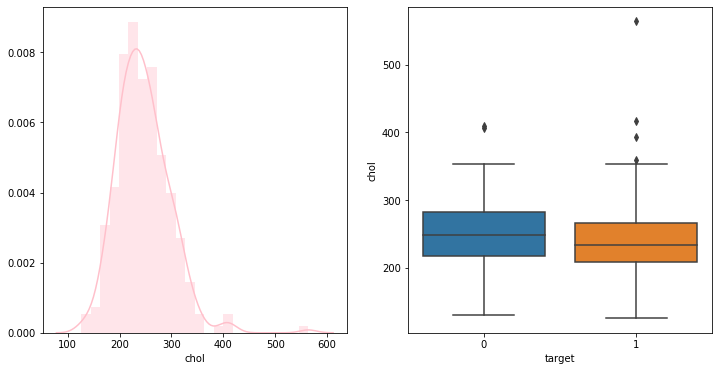

In [9]:
plt.subplots(12,figsize=(12,6))
plt.subplot(121)
sns.distplot(df['chol'],color='pink')
plt.subplot(122)
sns.boxplot(x=df['target'],y=df['chol'])

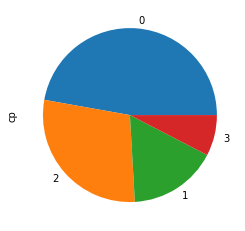

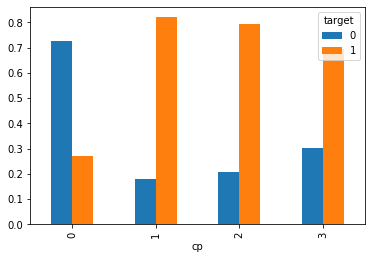

In [10]:

df['cp'].value_counts().plot(kind='pie')

pd.crosstab(df.cp,df.target,normalize='index').plot(kind='bar')


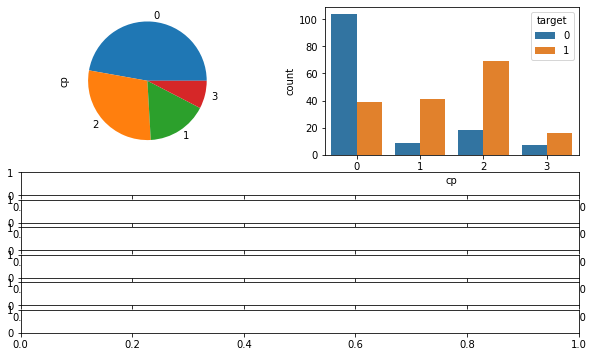

In [11]:
plt.subplots(12,figsize=(10,6))
plt.subplot(221)
df['cp'].value_counts().plot(kind='pie')
plt.subplot(222)
sns.countplot(x=df['cp'],hue=df['target'])

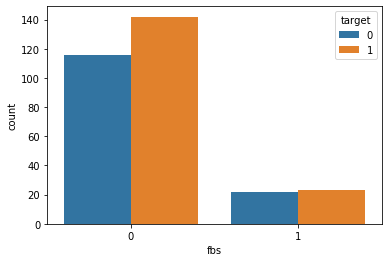

In [12]:
sns.countplot(x=df['fbs'],hue=df.target)

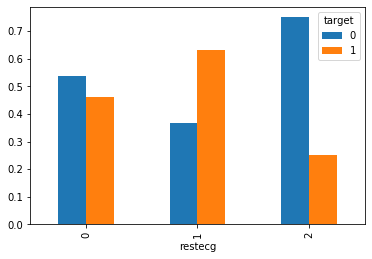

In [18]:
pd.crosstab(df.restecg,df.target,normalize='index').plot(kind='bar')

Looking at the plot we can see quite a few observation. For example rest ecg is directly corelated with high values of heart disease

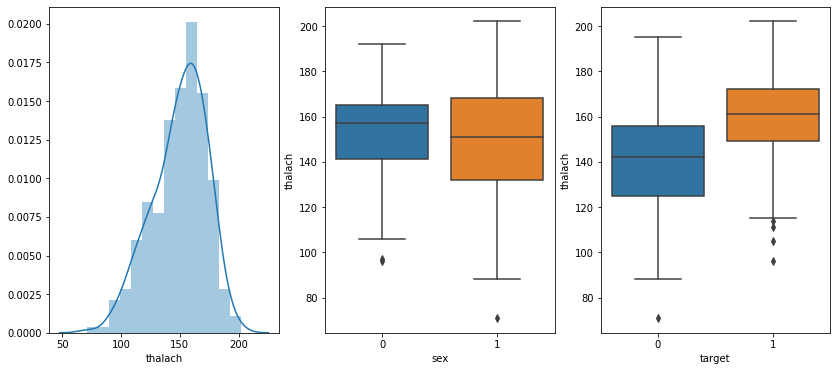

In [28]:
plt.subplots(13,figsize=(14,6))
plt.subplot(131)
sns.distplot(df["thalach"])
plt.subplot(132)
sns.boxplot(y=df["thalach"],x=df['sex'])
plt.subplot(133)
sns.boxplot(y=df["thalach"],x=df['target'])

THe above diagrams show the distribution of heart rate. From the second diagram from the left we can observe that both male & female have similar heart rate. Moreover from the diagrama on the righ we can also infer that people with heart disease have a higher heart rate 

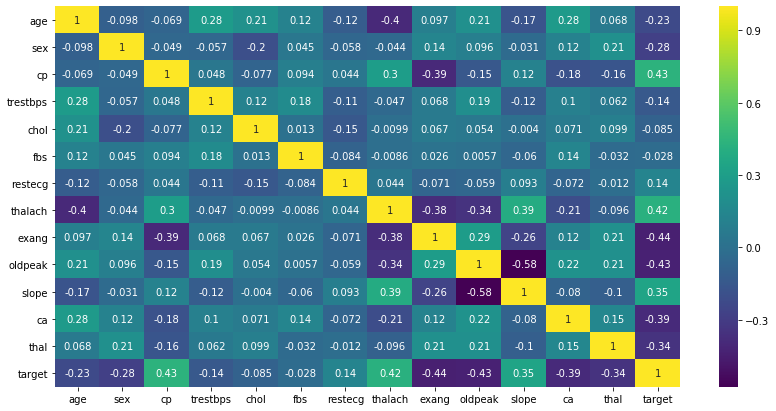

In [32]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [36]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

There are hardly any features that have a high direct correlation with the target. Furthermore, the data does not seem to have any multicollinearity as the correlation values are low

# Feature Engineering

In [41]:
df=pd.get_dummies(df,columns=['cp','restecg','slope','ca','thal'],drop_first=True)
y=df.target
X=df.drop("target",axis=1)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_columns=['age','trestbps','chol','thalach','oldpeak']
X_train['age']=scaler.fit_transform(X_train['age'].values.reshape(-1,1))
X_train['trestbps']=scaler.fit_transform(X_train['trestbps'].values.reshape(-1,1))
X_train['chol']=scaler.fit_transform(X_train['chol'].values.reshape(-1,1))  
X_train['thalach']=scaler.fit_transform(X_train['thalach'].values.reshape(-1,1))   
X_train['oldpeak']=scaler.fit_transform(X_train['oldpeak'].values.reshape(-1,1))   

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [89]:
X_test['age']=scaler.transform(X_test['age'].values.reshape(-1,1))
X_test['trestbps']=scaler.transform(X_test['trestbps'].values.reshape(-1,1))
X_test['chol']=scaler.transform(X_test['chol'].values.reshape(-1,1))  
X_test['thalach']=scaler.transform(X_test['thalach'].values.reshape(-1,1))   
X_test['oldpeak']=scaler.transform(X_test['oldpeak'].values.reshape(-1,1))

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

# Logistic Regression

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The cross validation score mean is  0.8016161616161616
              precision    recall  f1-score   support

           0       0.79      0.43      0.56        35
           1       0.65      0.90      0.76        41

    accuracy                           0.68        76
   macro avg       0.72      0.67      0.66        76
weighted avg       0.71      0.68      0.66        76



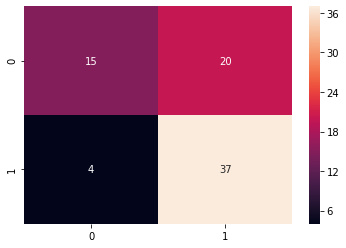

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=LogisticRegression(C=1.0,penalty='l2')
lr.fit(X_train,y_train)
print("The cross validation score mean is ",cross_val_score(lr,X_train,y_train,cv=3).mean())
pred=lr.predict(X_test)
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

# Support Vector Machine

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The de

The cross validation score is  0.7664069264069263


C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.46      1.00      0.63        35
           1       0.00      0.00      0.00        41

    accuracy                           0.46        76
   macro avg       0.23      0.50      0.32        76
weighted avg       0.21      0.46      0.29        76



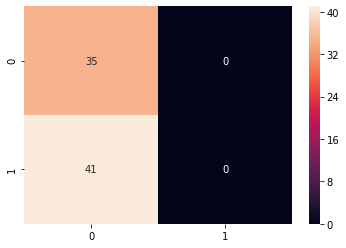

In [106]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print("The cross validation score is ",cross_val_score(svc,X_train,y_train).mean())
pred=svc.predict(X_test)
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

# Decision Classifer

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The cross validation score is  0.6957575757575758
              precision    recall  f1-score   support

           0       0.52      0.74      0.61        35
           1       0.65      0.41      0.51        41

    accuracy                           0.57        76
   macro avg       0.59      0.58      0.56        76
weighted avg       0.59      0.57      0.56        76



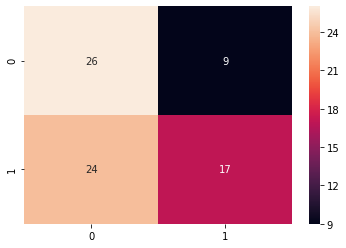

In [130]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
print("The cross validation score is ",cross_val_score(dc,X_train,y_train).mean())
pred=dc.predict(X_test)
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

# Random Forest Classifier

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The cross validation score is  0.7352958152958152
              precision    recall  f1-score   support

           0       0.63      0.91      0.74        35
           1       0.88      0.54      0.67        41

    accuracy                           0.71        76
   macro avg       0.75      0.73      0.71        76
weighted avg       0.76      0.71      0.70        76



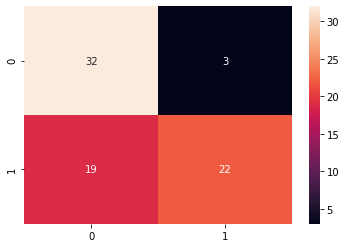

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print("The cross validation score is ",cross_val_score(rf,X_train,y_train).mean())
pred=rf.predict(X_test)
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

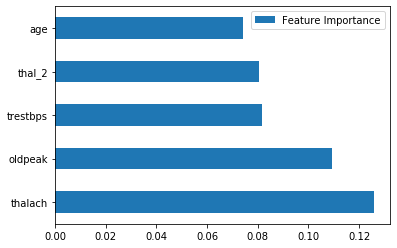

In [116]:

pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=['Feature Importance']).sort_values("Feature Importance",ascending=False).head(5).plot(kind='barh')

# Gradient Boosting Classifier

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The cross validation score is  0.8020779220779222
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.80      0.90      0.85        41

    accuracy                           0.83        76
   macro avg       0.84      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



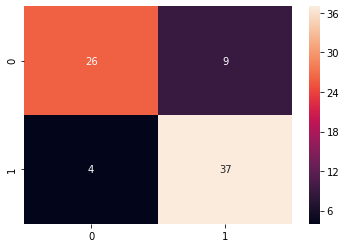

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
print("The cross validation score is ",cross_val_score(gbc,X_train,y_train).mean())
pred=gbc.predict(X_test)
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

# AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.52      0.74      0.61        35
           1       0.65      0.41      0.51        41

    accuracy                           0.57        76
   macro avg       0.59      0.58      0.56        76
weighted avg       0.59      0.57      0.56        76



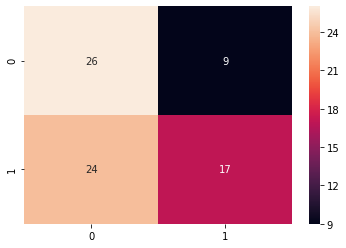

In [133]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
abc.fit(X_train,y_train)
abc.predict(X_test)
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)


# XGBoost

In [122]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [123]:
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [134]:
xg_reg.fit(X_train,y_train)

pred = xg_reg.predict(X_test)

C:\Users\skama\anaconda3\Anaconda 3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



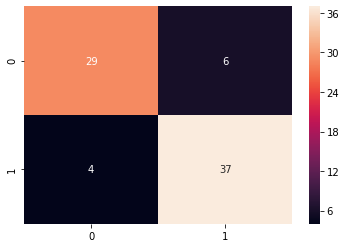

In [135]:
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)